# Capstone 2: Biodiversity Project

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:


In [205]:
from matplotlib import pyplot as plt
import pandas as pd

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:


In [207]:
species = pd.read_csv('species_info.csv')

In [208]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [209]:
species.info()
print(species.scientific_name.count())
print(species.scientific_name.nunique())
#sc_name_cm_name=species.groupby('scientific_name').common_names.count().reset_index()
#print(sc_name_cm_name)
#species['duplication']=species.apply()
#sc_name_cm_name['duplication']=sc_name_cm_name.common_names.apply(lambda x: True if x>1 else False)
#duplicate_check = species.scientific_name.duplicated(keep=False)
#if( duplicate_check.any() ):
#    print('duplicate!')
#print(duplicate)
#duplicate_entry = species[duplicate].groupby(['scientific_name','common_names']).category.count()
#print(species[duplicate].groupby('scientific_name'))
#duplicate_entry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
category               5824 non-null object
scientific_name        5824 non-null object
common_names           5824 non-null object
conservation_status    191 non-null object
dtypes: object(4)
memory usage: 182.1+ KB
5824
5541


What are the different values of `category` in `species`?

In [210]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [211]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.

In [212]:
conservation_status = species.groupby('conservation_status').scientific_name.nunique().reset_index()
conservation_status

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.


In [213]:
species.fillna('No Intervention', inplace=True)

Great! Now run the same `groupby` as before to see how many species require `No Protection`.

In [214]:
#conservation_status = species.groupby('conservation_status').scientific_name.count().reset_index()
#conservation_status

conservation_status = species.groupby('conservation_status').scientific_name.nunique().reset_index()
conservation_status


,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.


In [215]:
protection_counts = species.groupby('conservation_status')\
.scientific_name.nunique().reset_index()\
.sort_values(by='scientific_name')
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


Now let's create a bar chart!


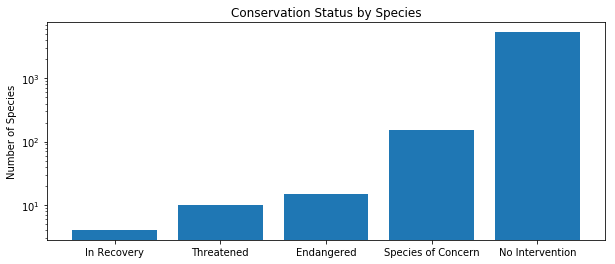

In [216]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.bar(range(len(protection_counts.scientific_name)),protection_counts.scientific_name, log=True)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(protection_counts.conservation_status)
ax.set_ylabel('Number of Species')
ax.set_title('Conservation Status by Species')
plt.show()

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [217]:
species['is_protected'] = species.apply(lambda row: False if row.conservation_status == 'No Intervention' else True, axis=1)
species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


Let's group by *both* `category` and `is_protected`.  Save your results to `category_counts`.

In [218]:
category_count = species.groupby(['category','is_protected']).scientific_name.nunique().reset_index()

Examine `category_count`.

In [219]:
category_count.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


It's going to be easier to view this data if we pivot it.
Save your pivoted data to `category_pivot`.

In [220]:
category_pivot = category_count.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

Examine `category_pivot`.

In [221]:
category_pivot.head()

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [222]:
category_pivot.columns=['category','not_protected','protected']
category_pivot.head()

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [224]:
category_pivot['percent_protected']=category_pivot.protected/(category_pivot.protected+category_pivot.not_protected)

Examine `category_pivot`.

In [225]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Create a table called `contingency` and fill it in with the correct numbers

In [226]:
contingency = [[30, 146],[75, 413]]

In order to perform our chi square test, we'll need to import the correct function from scipy.

In [227]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [228]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print(chi2)
print(pval)
print(dof)
print(expected)

0.1617014831654557
0.6875948096661336
1
[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [229]:
contingency_2 = [[5,73],[30,146]]
output = chi2_contingency(contingency_2)
print(output)

(4.289183096203645, 0.03835559022969898, 1, array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))


In [230]:
contingency_3 = [[5, 328], [5,73]]
output = chi2_contingency(contingency_3)

In [231]:
print(output)

(4.513570089848144, 0.03362698310726171, 1, array([[  8.10218978, 324.89781022],
       [  1.89781022,  76.10218978]]))


# Step 5

Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`.

In [232]:
observations=pd.read_csv('observations.csv')
observations.head(10)
observations.info()
print(observations.scientific_name.nunique())
print(observations.park_name.unique())
#for park in observations.park_name.unique():
nSpecies = observations.groupby('park_name')['scientific_name'].nunique()
nObs     = observations.groupby('park_name')['observations'].sum()
print(nSpecies)
print(nObs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
scientific_name    23296 non-null object
park_name          23296 non-null object
observations       23296 non-null int64
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
5541
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64
park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  

Create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [233]:
species['is_sheep']=species.apply(lambda row: 'Sheep' in str(row.common_names), axis=1)

Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [234]:
species.loc[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [235]:
sheep_species = species.loc[(species.is_sheep) & (species.category=='Mammal')]
sheep_species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [236]:
sheep_observations = sheep_species.merge(observations)
sheep_observations

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219
5,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Bryce National Park,109
6,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yosemite National Park,117
7,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Great Smoky Mountains National Park,48
8,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yellowstone National Park,67
9,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yosemite National Park,39


How many total sheep observations (across all three species) were made at each national park? Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [237]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

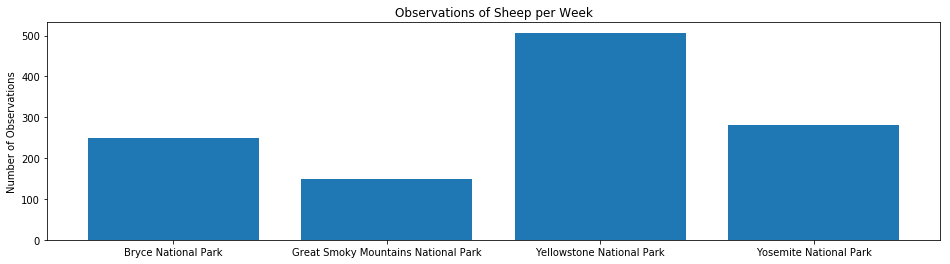

In [238]:
plt.figure(figsize=(16,4))
ax=plt.subplot()
ax.bar(range(len(obs_by_park.observations)),obs_by_park.observations)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(obs_by_park.park_name)
ax.set_ylabel('Number of Observations')
ax.set_title('Observations of Sheep per Week')
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage point.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the sample size calculator at <a href="https://www.optimizely.com/sample-size-calculator/">Optimizely</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

In [239]:
min_detectable_effect = (15-10)*100./15
baseline_conversion_rate=15
print(min_detectable_effect)
sample_size=510

33.3333333333


How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [240]:
week_bryce = 510/250.
week_yellowstone = 510/507.
print(week_bryce)
print(week_yellowstone)

2.04
1.00591715976
